<a href="https://colab.research.google.com/github/Hairychest/sparks-manaidu-codes/blob/main/task6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Name : Masavarapu AppalaNaidu

In [2]:
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

In [3]:
dataset = pd.read_csv('/content/Iris.csv')
print(dataset.head())
print('Number of samples in Dataset',len(dataset))
print('Number of features in Datset',dataset.shape[1]-2)
print('List of Classes :',dataset.iloc[:,-1].unique())


   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa
Number of samples in Dataset 150
Number of features in Datset 4
List of Classes : ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [4]:
#encode species column
dataset['Species'] = dataset['Species'].map(lambda x : {j:i for i,j in enumerate(dataset['Species'].unique())}[x])

#Splitting dataset into train, test : (80/20)
X_train , X_test, y_train, y_test = train_test_split(dataset.iloc[:,1:-1], dataset.iloc[:,-1],test_size=0.2,random_state=1,stratify = dataset.iloc[:,-1])


#instantiate Decision Tree Classifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)
print('accuracy_score for training set', accuracy_score(y_train,dtree.predict(X_train)))
print('accuracy_score for test set', accuracy_score(y_test,dtree.predict(X_test)))

accuracy_score for training set 1.0
accuracy_score for test set 0.9666666666666667


### Although our model has good training accuracy, it is overfitting

In [5]:
cv_model = DecisionTreeClassifier()

params_grid = {'random_state':[1],
               'max_depth':np.arange(2,11),
               'criterion':['gini', 'entropy', 'log_loss'],
               'splitter':['best','random']
               }

gscv = GridSearchCV(cv_model, cv=3,param_grid=params_grid,scoring='accuracy',verbose=1)
gscv.fit(X_train,y_train)
best_params =  gscv.best_params_
print('Best Params', gscv.best_params_)
print('Best_score', gscv.best_score_)

Fitting 3 folds for each of 54 candidates, totalling 162 fits
Best Params {'criterion': 'gini', 'max_depth': 5, 'random_state': 1, 'splitter': 'random'}
Best_score 0.9500000000000001


In [6]:
#HyperTuned Decision Tree Classifier model
hdtree = DecisionTreeClassifier(**best_params)
hdtree.fit(X_train,y_train)
print('accuracy_score for training set', accuracy_score(y_train,hdtree.predict(X_train)))
print('accuracy_score for test set', accuracy_score(y_test,hdtree.predict(X_test)))

accuracy_score for training set 0.975
accuracy_score for test set 0.9666666666666667


### By HyperParameter Tuning We have reduced Overfitting on the training data we have added Generalization to the Classifier model. Hyperparameter tuning is done not only for increasing test metric but also to make sure that the model is generalized for data which model had not seen.

In [7]:
dataset['Species'] = dataset['Species'].map(lambda x : {i:j for i,j in enumerate(['Iris-setosa' ,'Iris-versicolor', 'Iris-virginica'])}[x])

[Text(0.375, 0.9166666666666666, 'PetalLengthCm <= 2.018\ngini = 0.667\nsamples = 120\nvalue = [40, 40, 40]\nclass = Iris-setosa'),
 Text(0.25, 0.75, 'gini = 0.0\nsamples = 40\nvalue = [40, 0, 0]\nclass = Iris-setosa'),
 Text(0.5, 0.75, 'PetalLengthCm <= 5.716\ngini = 0.5\nsamples = 80\nvalue = [0, 40, 40]\nclass = Iris-versicolor'),
 Text(0.375, 0.5833333333333334, 'PetalLengthCm <= 4.767\ngini = 0.478\nsamples = 66\nvalue = [0, 40, 26]\nclass = Iris-versicolor'),
 Text(0.25, 0.4166666666666667, 'gini = 0.0\nsamples = 35\nvalue = [0, 35, 0]\nclass = Iris-versicolor'),
 Text(0.5, 0.4166666666666667, 'PetalWidthCm <= 1.64\ngini = 0.271\nsamples = 31\nvalue = [0, 5, 26]\nclass = Iris-virginica'),
 Text(0.25, 0.25, 'SepalLengthCm <= 6.523\ngini = 0.5\nsamples = 6\nvalue = [0, 3, 3]\nclass = Iris-versicolor'),
 Text(0.125, 0.08333333333333333, 'gini = 0.48\nsamples = 5\nvalue = [0, 2, 3]\nclass = Iris-virginica'),
 Text(0.375, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0

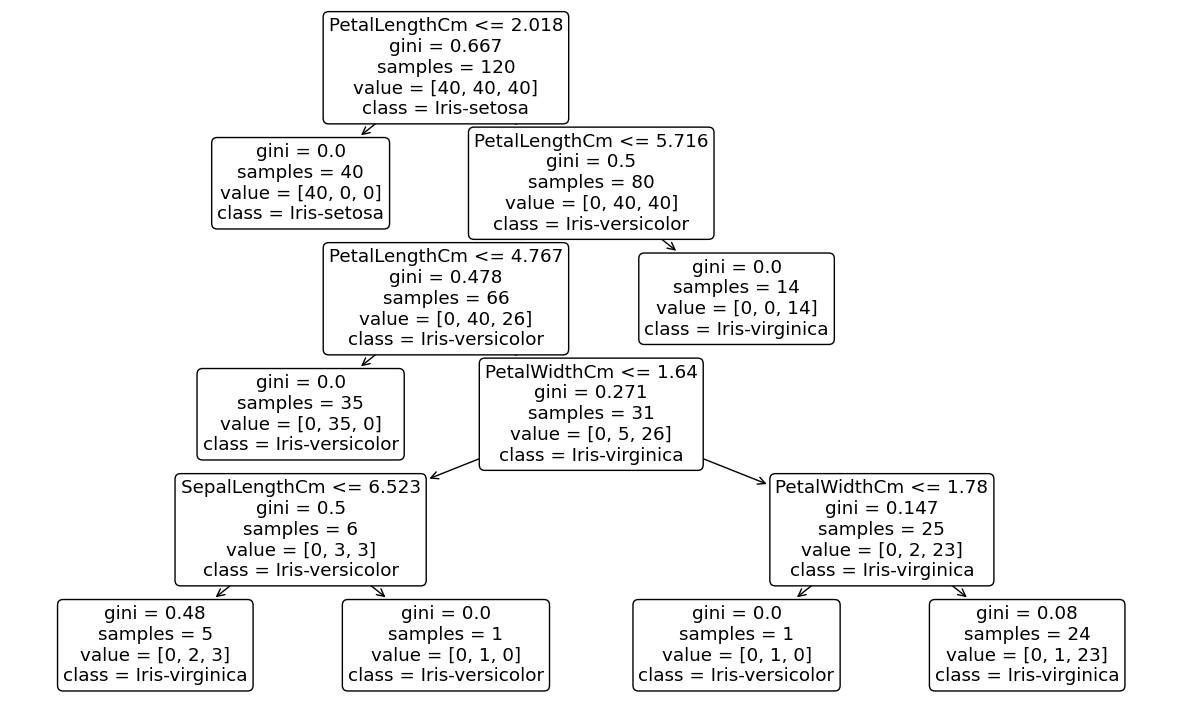

In [8]:
#Visualizing the model
plt.figure(figsize=(15,9))
plot_tree(hdtree,feature_names=dataset.columns[1:-1],class_names=['Iris-setosa' ,'Iris-versicolor', 'Iris-virginica'],rounded=True)

### We have Visualized the Decision Tree Classifier Graphically